Exploring data with Python - visualize data
Loading our data

In [1]:
import pandas as pd
df_students = pd.read_csv('grades.csv',delimiter=',',header='infer')

# 1. Clean the data, remove Null Values
df_students = df_students.dropna(axis=0, how='any')
print(df_students.isnull().sum())

#2. Stablish those students that approved the class and add the column to the DF
approve = pd.Series(df_students['Grade'] >= 60)
df_students = pd.concat([df_students, approve.rename('Approved')], axis= 1)

print(df_students)

Name          0
StudyHours    0
Grade         0
dtype: int64
         Name  StudyHours  Grade  Approved
0         Dan       10.00   50.0     False
1       Joann       11.50   50.0     False
2       Pedro        9.00   47.0     False
3       Rosie       16.00   97.0      True
4       Ethan        9.25   49.0     False
5       Vicky        1.00    3.0     False
6    Frederic       11.50   53.0     False
7      Jimmie        9.00   42.0     False
8      Rhonda        8.50   26.0     False
9    Giovanni       14.50   74.0      True
10  Francesca       15.50   82.0      True
11      Rajab       13.75   62.0      True
12    Naiyana        9.00   37.0     False
13       Kian        8.00   15.0     False
14      Jenny       15.50   70.0      True
15     Jakeem        8.00   27.0     False
16     Helena        9.00   36.0     False
17      Ismat        6.00   35.0     False
18      Anila       10.00   48.0     False
19       Skye       12.00   52.0     False
20     Daniel       12.50   63.0    

Use Matplot to Visualize the data

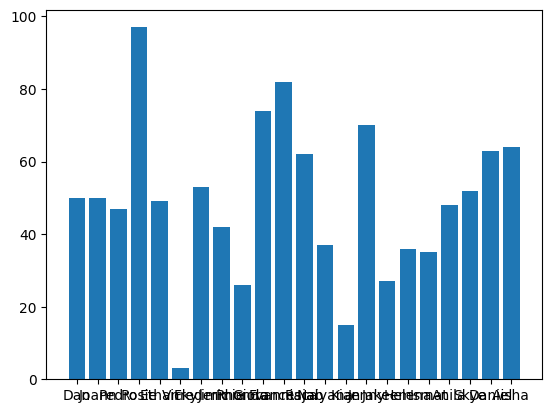

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

#Create a bar pplot 
plt.bar(x=df_students['Name'], height= df_students['Grade'])
plt.show()

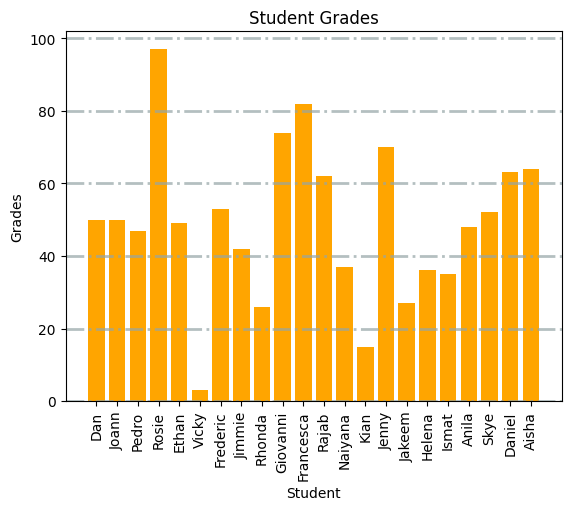

In [3]:
#improve  the chart to make it clearer what we're looking at.
plt.bar(x=df_students['Name'],height=df_students['Grade'], color= 'orange')

#Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grades')
plt.grid(color='#95a5a6',linestyle='-.',linewidth=2,axis='y', alpha=0.7)
plt.xticks(rotation= 90)

plt.show()

A plot is contained in a figure, before the fig was created by defaul.
However I would be able to create a new figure an add as many polts as I wants in that figure

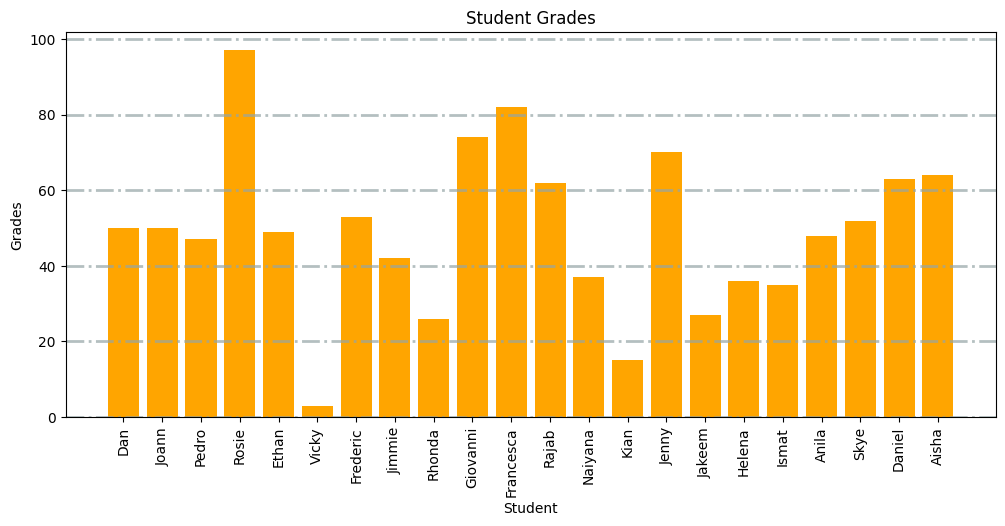

In [4]:
fig =plt.figure(figsize=(12,5))
plt.bar(x=df_students['Name'],height=df_students['Grade'], color= 'orange')

#Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grades')
plt.grid(color='#95a5a6',linestyle='-.',linewidth=2,axis='y', alpha=0.7)
plt.xticks(rotation= 90)

plt.show()

C:\Users\Andres Felipe\AppData\Local\Temp\ipykernel_13524\47016167.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students['Name'],rotation=90)


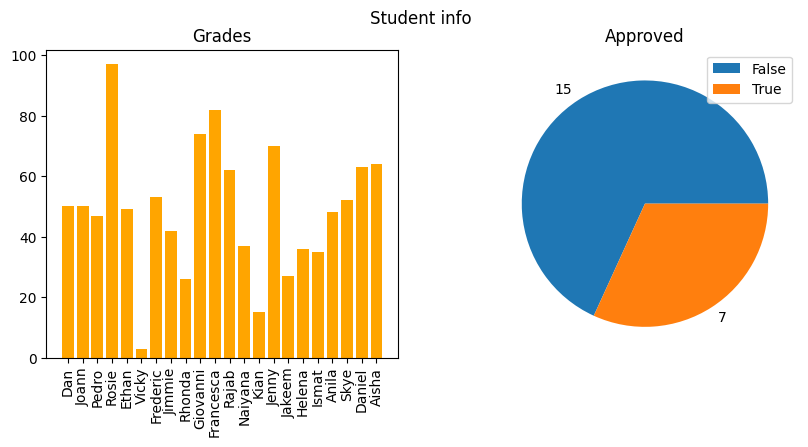

In [5]:
# Create a figure that contains two subplots
fig , ax = plt.subplots(1,2,figsize=(10,4))

#Create a bar plot in the first axis of name vs grade
ax[0].bar(x=df_students['Name'],height=df_students['Grade'], color= 'orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students['Name'],rotation=90)

#Create a Pie Chart of pass and resign
pass_count = df_students['Approved'].value_counts()
ax[1].pie(pass_count, labels=pass_count)
ax[1].set_title('Approved')
ax[1].legend(pass_count.keys().tolist())

#Figure Titel
fig.suptitle('Student info')

plt.show()





Until now, you've used methods of the Matplotlib.pyplot object to plot charts. However, Matplotlib is so foundational to graphics in Python that many packages, including Pandas, provide methods that abstract the underlying Matplotlib functions and simplify plotting. For example, the DataFrame provides its own methods for plotting data as shown in the following example, which plots a bar chart of study hours.

<Axes: xlabel='Name'>

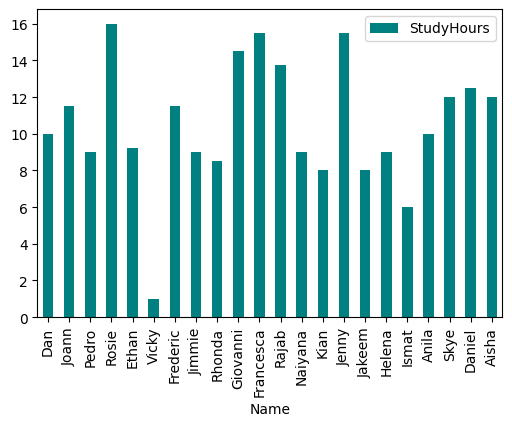

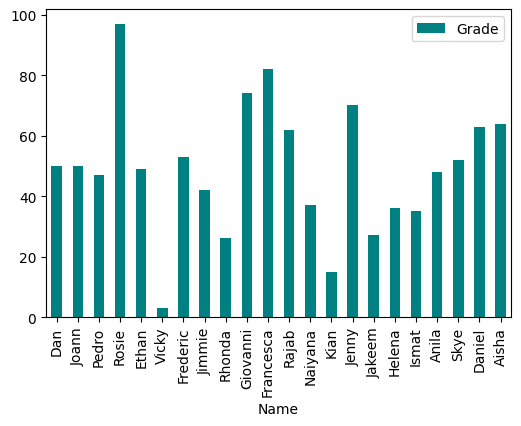

In [6]:
df_students.plot.bar(x='Name',y='StudyHours',color='teal', figsize=(6,4))
df_students.plot.bar(x='Name',y='Grade',color='teal', figsize=(6,4))

Getting started with statistical Analysis

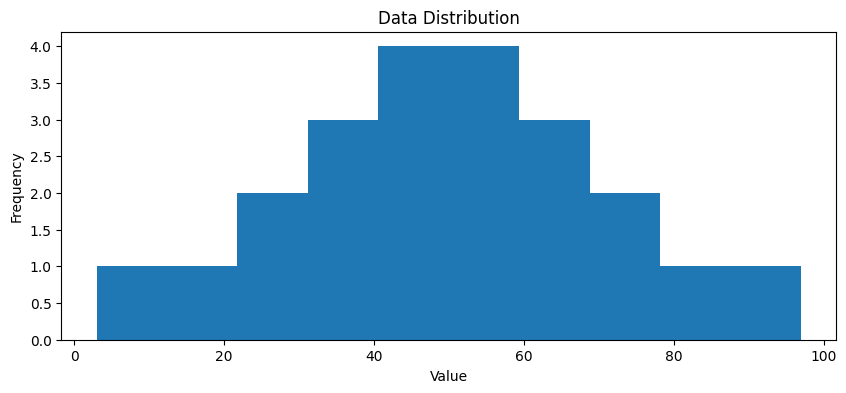

In [7]:
var_dataG = df_students['Grade']

fig = plt.figure(figsize=(10,4))
plt.hist(var_dataG)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

From the histogram we can interpret that 40% of the grades are between the range 40-60, on the orther hand grades lower than 20 ar just the 10% quite similar to grades over 75

minimun: 3.00,
Maximum: 97.00,
mean: 49.18,
mode: 50.00,
median: 49.50


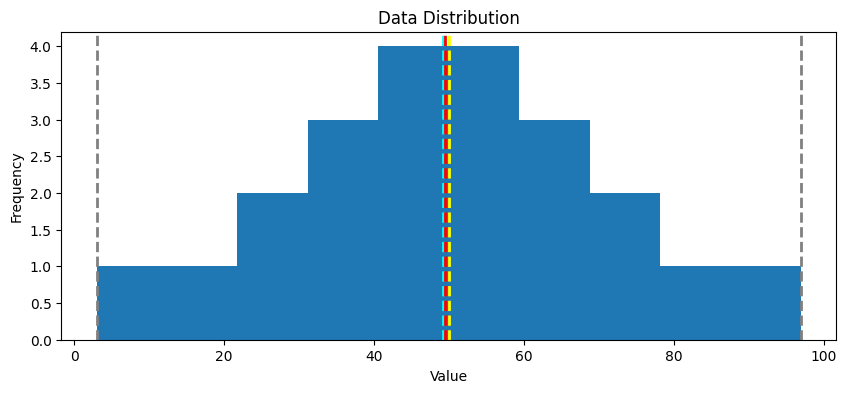

In [8]:
var = df_students['Grade']

minVal = var.min()
maxVal = var.max()
meanVal = var.mean()
modeVal = var.mode()[0]
medianVal = var.median()

print(f"minimun: {minVal:.2f},\nMaximum: {maxVal:.2f},\nmean: {meanVal:.2f},\nmode: {modeVal:.2f},\nmedian: {medianVal:.2f}")

#Create the figure
fig = plt.figure(figsize=(10,4))

plt.hist(var)

# Add lines for the statistics
plt.axvline(x= minVal, color='gray', linestyle='dashed' ,linewidth=2)
plt.axvline(x= meanVal, color='cyan', linestyle='dashed' ,linewidth=2)
plt.axvline(x= medianVal , color='red', linestyle='dashed' ,linewidth=2)
plt.axvline(x= modeVal, color= 'yellow', linestyle='dashed' ,linewidth=2)
plt.axvline(x= maxVal, color='gray', linestyle='dashed' ,linewidth=2)

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

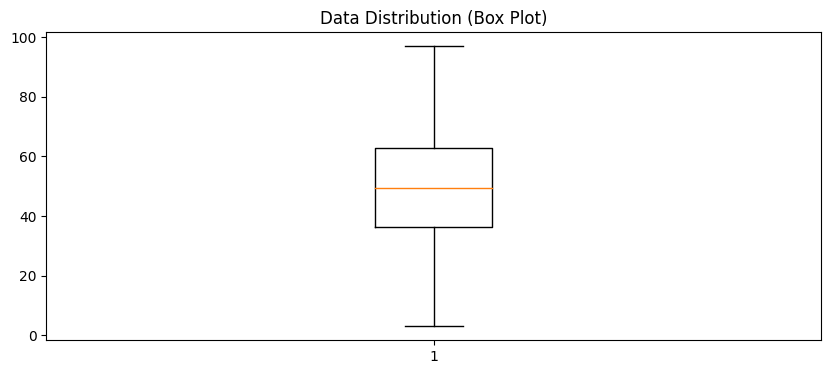

In [9]:
#Create a box plot (box and whickers)

#get the data
var_bp = df_students['Grade']

#Create the figure
fig = plt.figure(figsize=(10,4))

plt.boxplot(var_bp)

plt.title('Data Distribution (Box Plot)')

plt.show()

n some ways, it can be helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\Andres Felipe\AppData\Local\Temp\ipykernel_13524\1155163791.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


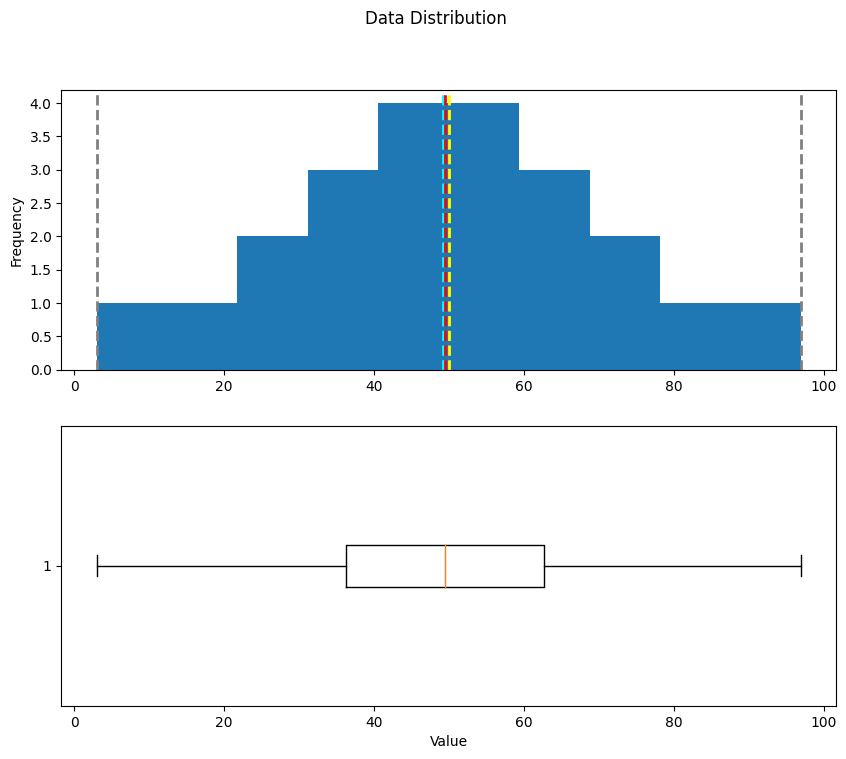

In [12]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

To explore this distribution in more detail, you need to understand that statistics is fundamentally about taking samples of data and using probability functions to extrapolate information about the full population of data.

If we have enough samples, we can calculate something called a probability density function, which estimates the distribution of grades for the full population.

The pyplot class from Matplotlib provides a helpful plot function to show this density.

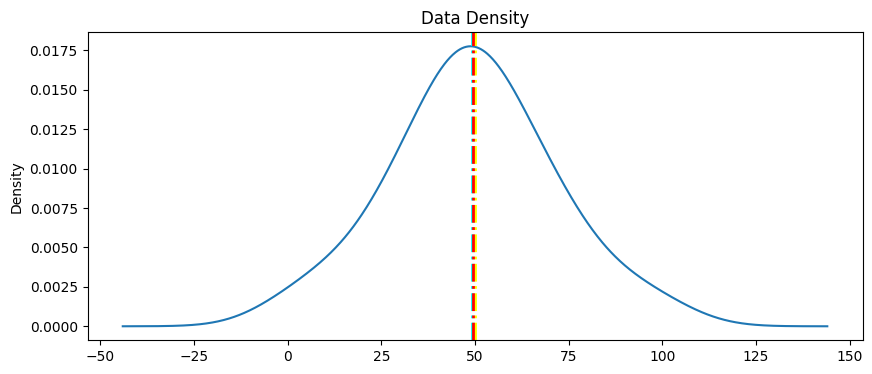

In [17]:
def prob_density(raw_data):
    from matplotlib import pyplot as plt
    #import 
    %matplotlib inline

    #creare the figure
    fig = plt.figure(figsize=(10,4))

    #use the method density, to plot it
    raw_data.plot.density() # import the module scipy
    plt.title('Data Density')

    #add measurements of central tendency
    plt.axvline(x= raw_data.mean(), color= 'cyan',linestyle='-.', linewidth=2)
    plt.axvline(x= raw_data.mode()[0], color= 'yellow',linestyle='-.', linewidth=2)
    plt.axvline(x= raw_data.median(), color= 'red',linestyle='-.', linewidth=2)

    plt.show()

prob_density(df_students['Grade'])

In [22]:
import numpy as np

x = np.array([1,2])
print(x[[False,True]])

values = np.array([False,True])
print(values.sum())

[2]
1
